In [12]:
import os
import keras
import numpy as np
import seaborn as sns
import tensorflow as tf
from keras import layers
from keras import callbacks
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from keras.src.legacy.preprocessing.image import ImageDataGenerator

In [2]:
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [3]:
# Specify GPU usage
physical_devices = tf.config.list_physical_devices('GPU')
print(physical_devices)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
# Normalize image color values
datagen = ImageDataGenerator(rescale = 1.0 / 255.0)

# Specify path, target shape, batch size, classifier output, color mode, and shuffle
train_generator = datagen.flow_from_directory(
    '../data/train',
    target_size = (32, 32),
    batch_size = 32,
    class_mode = 'binary',
    color_mode = 'rgb',
    shuffle = True
)

test_generator = datagen.flow_from_directory(
    '../data/test',
    target_size = (32, 32),
    batch_size = 32,
    class_mode = 'binary',
    color_mode = 'rgb',
    shuffle = True
)

Found 20001 images belonging to 2 classes.
Found 4999 images belonging to 2 classes.


In [5]:
########### CODE PROVIDED BY PROFESSOR ###########
model = keras.Sequential([
    keras.Input(shape=(32, 32, 3)),  # Explicit Input Layer
    layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(1, activation="sigmoid")  # Binary classification output
])

I0000 00:00:1738877148.607797  191198 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1738877148.608098  191198 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
########### CODE PROVIDED BY PROFESSOR ###########
model.compile(
	optimizer="adam",
    loss="binary_crossentropy",
	metrics=["accuracy"]
)

In [7]:
# Setup callbacks
early_stopping = callbacks.EarlyStopping(monitor = "val_loss", patience = 5, restore_best_weights = True)
model_checkpoint = callbacks.ModelCheckpoint('best_model.h5', monitor = 'val_loss', save_best_only = True)

In [8]:
model.fit(
    train_generator,
    epochs = 50,
    callbacks = [early_stopping , model_checkpoint],
    validation_data = test_generator,
    verbose = 2
)

Epoch 1/50


/Users/langtowl/miniconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


626/626 - 20s - 32ms/step - accuracy: 0.6233 - loss: 0.6385 - val_accuracy: 0.6739 - val_loss: 0.6127
Epoch 2/50


626/626 - 14s - 23ms/step - accuracy: 0.7173 - loss: 0.5597 - val_accuracy: 0.7329 - val_loss: 0.5353
Epoch 3/50


626/626 - 14s - 22ms/step - accuracy: 0.7486 - loss: 0.5099 - val_accuracy: 0.7598 - val_loss: 0.4910
Epoch 4/50


626/626 - 13s - 21ms/step - accuracy: 0.7790 - loss: 0.4711 - val_accuracy: 0.7810 - val_loss: 0.4632
Epoch 5/50


626/626 - 13s - 21ms/step - accuracy: 0.7967 - loss: 0.4424 - val_accuracy: 0.8006 - val_loss: 0.4369
Epoch 6/50


626/626 - 13s - 21ms/step - accuracy: 0.8104 - loss: 0.4128 - val_accuracy: 0.8120 - val_loss: 0.4128
Epoch 7/50
626/626 - 13s - 22ms/step - accuracy: 0.8239 - loss: 0.3904 - val_accuracy: 0.8058 - val_loss: 0.4168
Epoch 8/50
626/626 - 13s - 21ms/step - accuracy: 0.8368 - loss: 0.3665 - val_accuracy: 0.8102 - val_loss: 0.4289
Epoch 9/50
626/626 - 13s - 21ms/step - accuracy: 0.8475 - loss: 0.3500 - val_accuracy: 0.8076 - val_loss: 0.4201
Epoch 10/50


626/626 - 13s - 21ms/step - accuracy: 0.8554 - loss: 0.3346 - val_accuracy: 0.8164 - val_loss: 0.3983
Epoch 11/50
626/626 - 13s - 21ms/step - accuracy: 0.8721 - loss: 0.3024 - val_accuracy: 0.8208 - val_loss: 0.4210
Epoch 12/50
626/626 - 13s - 21ms/step - accuracy: 0.8836 - loss: 0.2801 - val_accuracy: 0.8224 - val_loss: 0.4585
Epoch 13/50
626/626 - 13s - 21ms/step - accuracy: 0.8891 - loss: 0.2668 - val_accuracy: 0.8230 - val_loss: 0.4156
Epoch 14/50
626/626 - 13s - 21ms/step - accuracy: 0.8986 - loss: 0.2406 - val_accuracy: 0.8154 - val_loss: 0.4565
Epoch 15/50
626/626 - 13s - 21ms/step - accuracy: 0.9120 - loss: 0.2231 - val_accuracy: 0.8268 - val_loss: 0.4474


In [9]:
########### CODE PROVIDED BY PROVESSOR ###########
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,426,245 (13.07 MB)

 Trainable params: 1,142,081 (4.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,284,164 (8.71 MB)

In [10]:
# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, verbose=2)

print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

157/157 - 2s - 15ms/step - accuracy: 0.8164 - loss: 0.3983
Test loss: 0.39829331636428833
Test accuracy: 0.8163632750511169


In [11]:
# Get true labels
true_labels = test_generator.classes

In [13]:
# Get predictions
pred_probs = model.predict(test_generator)
pred_labels = (pred_probs > 0.5).astype(int).flatten()

157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step


In [14]:
# Compute confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

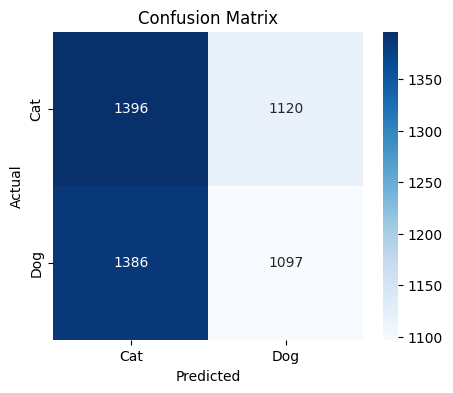

              precision    recall  f1-score   support

         Cat       0.50      0.55      0.53      2516
         Dog       0.49      0.44      0.47      2483

    accuracy                           0.50      4999
   macro avg       0.50      0.50      0.50      4999
weighted avg       0.50      0.50      0.50      4999



In [16]:
# Display confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Cat", "Dog"], yticklabels=["Cat", "Dog"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(true_labels, pred_labels, target_names=["Cat", "Dog"]))
